In [60]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE
pd.set_option('display.max_rows', 5)
pd.set_option('display.max_columns', 500)


In [61]:
Habitable=pd.read_csv('data.csv')
Habitable.sample(10)

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,pl_refname,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassprov,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,ttv_flag,st_refname,st_spectype,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_metratio,st_logg,st_loggerr1,st_loggerr2,st_logglim,sy_refname,rastr,ra,decstr,dec,sy_dist,sy_disterr1,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
62,GJ 1002 c,GJ 1002,1,1,2,Radial Velocity,2022,Multiple Observatories,Published Confirmed,0,<a refstr=SU_AACUTE_REZ_MASCARE_NTILDE_O_ET_AL...,21.202000,0.013000,-0.013000,0.0,0.0738,0.0021,-0.0021,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.36,0.17,-0.17,0.0,0.00428,0.00053,-0.00053,0.0,Msini,NaN,NaN,NaN,NaN,0.26,0.01,-0.01,0.0,182.0,5.0,-5.0,0.0,0,<a refstr=SU_AACUTE_REZ_MASCARE_NTILDE_O_ET_AL...,M5.5 V,3024.0,52.0,-52.0,0.0,0.14,0.01,-0.01,0.0,0.12,0.01,-0.01,0.0,-0.25,0.19,-0.19,0.0,[Fe/H],5.10,0.06,-0.06,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,00h06m42.35s,1.676464,-07d32m46.36s,-7.546212,4.84867,0.00303,-0.00304,NaN,NaN,NaN,7.439,0.021,-0.021,11.7804,0.000751,-0.000751,2022-12-17 00:00:00,2022-12,2022-12-17 00:00:00
186,Kepler-174 d,Kepler-174,0,1,3,Transit,2014,Kepler,Kepler Project Candidate (q1_q17_dr25_koi),0,<a refstr=Q1_Q17_DR25_KOI_TABLE href=https://e...,247.354914,0.001391,-0.001391,0.0,0.6639,NaN,NaN,0.0,2.290,0.100,-0.130,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.48,0.09,-0.09,0.0,212.0,NaN,NaN,0.0,0,<a refstr=Q1_Q17_DR25_KOI_TABLE href=https://e...,NaN,4859.0,97.0,-97.0,0.0,0.65,0.03,-0.04,0.0,0.64,0.05,-0.02,0.0,-0.52,0.15,-0.15,0.0,[Fe/H],4.62,0.05,-0.02,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,19h09m45.35s,287.438945,+43d49m55.22s,43.832005,384.75700,2.68400,-2.68400,14.530,0.057,-0.057,12.184,0.018,-0.018,14.2858,0.000242,-0.000242,2017-05-08 00:00:00,2017-08-31 00:00:00,2017-05-08 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,K2-9 b,K2-9,0,1,1,Transit,2015,K2,Published Candidate,0,<a refstr=VANDERBURG_ET_AL__2016 href=https://...,18.448653,NaN,NaN,0.0,NaN,NaN,NaN,NaN,3.330,NaN,NaN,0.0,0.297,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<a refstr=VANDERBURG_ET_AL__2016 href=https://...,NaN,3765.0,NaN,NaN,0.0,0.52,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,11h45m03.29s,176.263724,+00d00m19.47s,0.005409,82.96310,0.37470,-0.37140,15.860,0.195,-0.195,11.495,0.023,-0.023,14.8665,0.000584,-0.000584,2015-12-05 00:00:00,2016-01,2015-12-05 00:00:00
112,Kepler-283 c,Kepler-283,0,1,2,Transit,2014,Kepler,Published Confirmed,0,<a refstr=MANN_ET_AL__2013 href=https://ui.ads...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.311,0.082,-0.082,0.0,0.206,0.007,-0.007,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.85,0.10,-0.10,0.0,NaN,NaN,NaN,NaN,1,<a refstr=MANN_ET_AL__2013 href=https://ui.ads...,NaN,4141.0,58.0,-58.0,0.0,0.63,0.04,-0.04,0.0,0.66,0.07,-0.07,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<a refstr=STASSUN

In [62]:
InHabitable=pd.read_excel('Inhabitable Exoplanet.xlsx')
InHabitable.sample(10)

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,pl_refname,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassprov,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,ttv_flag,st_refname,st_spectype,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_metratio,st_logg,st_loggerr1,st_loggerr2,st_logglim,sy_refname,rastr,ra,decstr,dec,sy_dist,sy_disterr1,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
621,GJ 411 b,GJ 411,0,1,2,Radial Velocity,2019,Haute-Provence Observatory,Published Confirmed,0,<a refstr=STOCK_ET_AL__2020 href=https://ui.ad...,12.94600,0.005000,-0.005000,0.0,0.0789,0.00068,-0.00077,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.69,0.25,-0.25,0.0,0.00846,0.00079,-0.00079,0.0,Msini,0.1200,0.1200,-0.0900,0.0,3.13,0.2,-0.22,0.0,370.0,6.0,-7.0,0.0,0,<a refstr=STOCK_ET_AL__2020 href=https://ui.ad...,M1.5 V,3601.0,51.0,-51.0,0.0,0.39,0.0,0.0,0.0,0.39,0.01,-0.01,0.0,-0.090,0.16,-0.16,0.0,[Fe/H],4.87,0.07,-0.07,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,11h03m20.27s,165.834471,+35d58m20.34s,35.972317,5.675773,0.00591,-0.00591,7.49000,0.100,-0.100,3.501,0.352,-0.352,NaN,NaN,NaN,2021-02-26,2020-11,2021-03-04
13,14 Her b,14 Her,0,1,2,Radial Velocity,2002,W. M. Keck Observatory,Published Confirmed,0,<a refstr=NAEF_ET_AL__2004 href=https://ui.ads...,1796.40000,8.300000,-8.300000,0.0,2.8000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1506.45,19.07,-19.07,0.0,4.74000,0.06000,-0.06000,0.0,Msini,0.3380,0.0110,-0.0110,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<a refstr=NAEF_ET_AL__2004 href=https://ui.ads...,NaN,5255.0,50.0,-50.0,0.0,NaN,NaN,NaN,NaN,0.90,NaN,NaN,0.0,0.510,0.06,-0.06,0.0,[Fe/H],4.40,0.15,-0.15,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,16h10m24.50s,242.602101,+43d48m58.90s,43.816362,17.932300,0.00730,-0.00730,6.61935,0.023,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351,2018-04-25,2004-01,2014-08-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,EPIC 212587672 c,EPIC 212587672,0,1,2,Transit,2016,K2,Published Candidate,0,<a refstr=PETIGURA_ET_AL__2018 href=https://ui...,23.22600,0.003022,-0.003156,0.0,NaN,NaN,NaN,NaN,2.3,0.3,-0.2,0.0,0.21,0.03,-0.02,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<a refstr=PETIGURA_ET_AL__2018 href=https://ui...,NaN,NaN,NaN,NaN,NaN,0.95,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,13h41m46.68s,205.444513,-10d51m45.17s,-10.862547,320.070000,6.39200,-6.15200,12.48800,0.044,-0.044,10.857,0.021,-0.021,12.20380,0.000255,-0.000255,2017-12-14,2018-01,2017-12-14
739,GJ 86 b,GJ 86,0,2,1,Radial Velocity,1999,La Silla Observatory,Published Confirmed,0,<a refstr=BUTLER_ET_AL__2006 href=https://ui.a...,15.76491,0.000390,-0.000390,0.0,0.1130,0.00650,-0.00650,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1242.66,101.70,-101.70,0.0,3.91000,0.32000,-0.32000,0.0,Msini,0.0416,0.0072,-0.0072,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<a refstr=BUTLER_ET_AL__2006 href=https://ui.a...,NaN,5151.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.77,NaN,NaN,0.0,-0.268,NaN,NaN,0.0,[Fe

In [63]:
InHabitable.shape

(1403, 92)

In [64]:
Habitable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 92 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          237 non-null    object 
 1   hostname         237 non-null    object 
 2   default_flag     237 non-null    int64  
 3   sy_snum          237 non-null    int64  
 4   sy_pnum          237 non-null    int64  
 5   discoverymethod  237 non-null    object 
 6   disc_year        237 non-null    int64  
 7   disc_facility    237 non-null    object 
 8   soltype          237 non-null    object 
 9   pl_controv_flag  237 non-null    int64  
 10  pl_refname       237 non-null    object 
 11  pl_orbper        220 non-null    float64
 12  pl_orbpererr1    217 non-null    float64
 13  pl_orbpererr2    217 non-null    float64
 14  pl_orbperlim     220 non-null    float64
 15  pl_orbsmax       150 non-null    float64
 16  pl_orbsmaxerr1   69 non-null     float64
 17  pl_orbsmaxerr2  

In [66]:
string='''# COLUMN pl_name:        Planet Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN hostname:       Host Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN default_flag:   Default Parameter Set,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN sy_snum:        Number of Stars,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN sy_pnum:        Number of Planets,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN discoverymethod: Discovery Method,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN disc_year:      Discovery Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN disc_facility:  Discovery Facility,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN soltype:        Solution Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_controv_flag: Controversial Flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_refname:     Planetary Parameter Reference,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_orbper:      Orbital Period [days],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_orbpererr1:  Orbital Period Upper Unc. [days],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_orbpererr2:  Orbital Period Lower Unc. [days],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_orbperlim:   Orbital Period Limit Flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_orbsmax:     Orbit Semi-Major Axis [au]),,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_orbsmaxerr1: Orbit Semi-Major Axis Upper Unc. [au],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_orbsmaxerr2: Orbit Semi-Major Axis Lower Unc. [au],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_orbsmaxlim:  Orbit Semi-Major Axis Limit Flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_rade:        Planet Radius [Earth Radius],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_radeerr1:    Planet Radius Upper Unc. [Earth Radius],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_radeerr2:    Planet Radius Lower Unc. [Earth Radius],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_radelim:     Planet Radius Limit Flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_radj:        Planet Radius [Jupiter Radius],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_radjerr1:    Planet Radius Upper Unc. [Jupiter Radius],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_radjerr2:    Planet Radius Lower Unc. [Jupiter Radius],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_radjlim:     Planet Radius Limit Flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_bmasse:      Planet Mass or Mass*sin(i) [Earth Mass],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_bmasseerr1:  Planet Mass or Mass*sin(i) [Earth Mass] Upper Unc.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_bmasseerr2:  Planet Mass or Mass*sin(i) [Earth Mass] Lower Unc.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_bmasselim:   Planet Mass or Mass*sin(i) [Earth Mass] Limit Flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_bmassj:      Planet Mass or Mass*sin(i) [Jupiter Mass],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_bmassjerr1:  Planet Mass or Mass*sin(i) [Jupiter Mass] Upper Unc.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_bmassjerr2:  Planet Mass or Mass*sin(i) [Jupiter Mass] Lower Unc.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_bmassjlim:   Planet Mass or Mass*sin(i) [Jupiter Mass] Limit Flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_bmassprov:   Planet Mass or Mass*sin(i) Provenance,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_orbeccen:    Eccentricity,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_orbeccenerr1: Eccentricity Upper Unc.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_orbeccenerr2: Eccentricity Lower Unc.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_orbeccenlim: Eccentricity Limit Flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_insol:       Insolation Flux [Earth Flux],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_insolerr1:   Insolation Flux Upper Unc. [Earth Flux],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_insolerr2:   Insolation Flux Lower Unc. [Earth Flux],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_insollim:    Insolation Flux Limit Flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_eqt:         Equilibrium Temperature [K],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_eqterr1:     Equilibrium Temperature Upper Unc. [K],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_eqterr2:     Equilibrium Temperature Lower Unc. [K],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_eqtlim:      Equilibrium Temperature Limit Flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN ttv_flag:       Data show Transit Timing Variations,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_refname:     Stellar Parameter Reference,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_spectype:    Spectral Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_teff:        Stellar Effective Temperature [K],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_tefferr1:    Stellar Effective Temperature Upper Unc. [K],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_tefferr2:    Stellar Effective Temperature Lower Unc. [K],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_tefflim:     Stellar Effective Temperature Limit Flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_rad:         Stellar Radius [Solar Radius],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_raderr1:     Stellar Radius Upper Unc. [Solar Radius],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_raderr2:     Stellar Radius Lower Unc. [Solar Radius],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_radlim:      Stellar Radius Limit Flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_mass:        Stellar Mass [Solar mass],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_masserr1:    Stellar Mass Upper Unc. [Solar mass],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_masserr2:    Stellar Mass Lower Unc. [Solar mass],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_masslim:     Stellar Mass Limit Flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_met:         Stellar Metallicity [dex],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_meterr1:     Stellar Metallicity Upper Unc. [dex],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_meterr2:     Stellar Metallicity Lower Unc. [dex],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_metlim:      Stellar Metallicity Limit Flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_metratio:    Stellar Metallicity Ratio,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_logg:        Stellar Surface Gravity [log10(cm/s**2)],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_loggerr1:    Stellar Surface Gravity Upper Unc. [log10(cm/s**2)],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_loggerr2:    Stellar Surface Gravity Lower Unc. [log10(cm/s**2)],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_logglim:     Stellar Surface Gravity Limit Flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN sy_refname:     System Parameter Reference,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN rastr:          RA [sexagesimal],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN ra:             RA [deg],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN decstr:         Dec [sexagesimal],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN dec:            Dec [deg],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN sy_dist:        Distance [pc],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN sy_disterr1:    Distance [pc] Upper Unc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN sy_disterr2:    Distance [pc] Lower Unc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN sy_vmag:        V (Johnson) Magnitude,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN sy_vmagerr1:    V (Johnson) Magnitude Upper Unc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN sy_vmagerr2:    V (Johnson) Magnitude Lower Unc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN sy_kmag:        Ks (2MASS) Magnitude,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN sy_kmagerr1:    Ks (2MASS) Magnitude Upper Unc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN sy_kmagerr2:    Ks (2MASS) Magnitude Lower Unc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN sy_gaiamag:     Gaia Magnitude,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN sy_gaiamagerr1: Gaia Magnitude Upper Unc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN sy_gaiamagerr2: Gaia Magnitude Lower Unc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN rowupdate:      Date of Last Update,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_pubdate:     Planetary Parameter Reference Publication Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN releasedate:    Release Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
#,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,'''
string=string.replace(',','')
string 

'# COLUMN pl_name:        Planet Name\n# COLUMN hostname:       Host Name\n# COLUMN default_flag:   Default Parameter Set\n# COLUMN sy_snum:        Number of Stars\n# COLUMN sy_pnum:        Number of Planets\n# COLUMN discoverymethod: Discovery Method\n# COLUMN disc_year:      Discovery Year\n# COLUMN disc_facility:  Discovery Facility\n# COLUMN soltype:        Solution Type\n# COLUMN pl_controv_flag: Controversial Flag\n# COLUMN pl_refname:     Planetary Parameter Reference\n# COLUMN pl_orbper:      Orbital Period [days]\n# COLUMN pl_orbpererr1:  Orbital Period Upper Unc. [days]\n# COLUMN pl_orbpererr2:  Orbital Period Lower Unc. [days]\n# COLUMN pl_orbperlim:   Orbital Period Limit Flag\n# COLUMN pl_orbsmax:     Orbit Semi-Major Axis [au])\n# COLUMN pl_orbsmaxerr1: Orbit Semi-Major Axis Upper Unc. [au]\n# COLUMN pl_orbsmaxerr2: Orbit Semi-Major Axis Lower Unc. [au]\n# COLUMN pl_orbsmaxlim:  Orbit Semi-Major Axis Limit Flag\n# COLUMN pl_rade:        Planet Radius [Earth Radius]\n# COL

In [67]:
string=string.replace('# COLUMN','')
string

' pl_name:        Planet Name\n hostname:       Host Name\n default_flag:   Default Parameter Set\n sy_snum:        Number of Stars\n sy_pnum:        Number of Planets\n discoverymethod: Discovery Method\n disc_year:      Discovery Year\n disc_facility:  Discovery Facility\n soltype:        Solution Type\n pl_controv_flag: Controversial Flag\n pl_refname:     Planetary Parameter Reference\n pl_orbper:      Orbital Period [days]\n pl_orbpererr1:  Orbital Period Upper Unc. [days]\n pl_orbpererr2:  Orbital Period Lower Unc. [days]\n pl_orbperlim:   Orbital Period Limit Flag\n pl_orbsmax:     Orbit Semi-Major Axis [au])\n pl_orbsmaxerr1: Orbit Semi-Major Axis Upper Unc. [au]\n pl_orbsmaxerr2: Orbit Semi-Major Axis Lower Unc. [au]\n pl_orbsmaxlim:  Orbit Semi-Major Axis Limit Flag\n pl_rade:        Planet Radius [Earth Radius]\n pl_radeerr1:    Planet Radius Upper Unc. [Earth Radius]\n pl_radeerr2:    Planet Radius Lower Unc. [Earth Radius]\n pl_radelim:     Planet Radius Limit Flag\n pl_ra

In [68]:
print(' pl_name:        Planet Name\n hostname:       Host Name\n default_flag:   Default Parameter Set\n sy_snum:        Number of Stars\n sy_pnum:        Number of Planets\n discoverymethod: Discovery Method\n disc_year:      Discovery Year\n disc_facility:  Discovery Facility\n soltype:        Solution Type\n pl_controv_flag: Controversial Flag\n pl_refname:     Planetary Parameter Reference\n pl_orbper:      Orbital Period [days]\n pl_orbpererr1:  Orbital Period Upper Unc. [days]\n pl_orbpererr2:  Orbital Period Lower Unc. [days]\n pl_orbperlim:   Orbital Period Limit Flag\n pl_orbsmax:     Orbit Semi-Major Axis [au])\n pl_orbsmaxerr1: Orbit Semi-Major Axis Upper Unc. [au]\n pl_orbsmaxerr2: Orbit Semi-Major Axis Lower Unc. [au]\n pl_orbsmaxlim:  Orbit Semi-Major Axis Limit Flag\n pl_rade:        Planet Radius [Earth Radius]\n pl_radeerr1:    Planet Radius Upper Unc. [Earth Radius]\n pl_radeerr2:    Planet Radius Lower Unc. [Earth Radius]\n pl_radelim:     Planet Radius Limit Flag\n pl_radj:        Planet Radius [Jupiter Radius]\n pl_radjerr1:    Planet Radius Upper Unc. [Jupiter Radius]\n pl_radjerr2:    Planet Radius Lower Unc. [Jupiter Radius]\n pl_radjlim:     Planet Radius Limit Flag\n pl_bmasse:      Planet Mass or Mass*sin(i) [Earth Mass]\n pl_bmasseerr1:  Planet Mass or Mass*sin(i) [Earth Mass] Upper Unc.\n pl_bmasseerr2:  Planet Mass or Mass*sin(i) [Earth Mass] Lower Unc.\n pl_bmasselim:   Planet Mass or Mass*sin(i) [Earth Mass] Limit Flag\n pl_bmassj:      Planet Mass or Mass*sin(i) [Jupiter Mass]\n pl_bmassjerr1:  Planet Mass or Mass*sin(i) [Jupiter Mass] Upper Unc.\n pl_bmassjerr2:  Planet Mass or Mass*sin(i) [Jupiter Mass] Lower Unc.\n pl_bmassjlim:   Planet Mass or Mass*sin(i) [Jupiter Mass] Limit Flag\n pl_bmassprov:   Planet Mass or Mass*sin(i) Provenance\n pl_orbeccen:    Eccentricity\n pl_orbeccenerr1: Eccentricity Upper Unc.\n pl_orbeccenerr2: Eccentricity Lower Unc.\n pl_orbeccenlim: Eccentricity Limit Flag\n pl_insol:       Insolation Flux [Earth Flux]\n pl_insolerr1:   Insolation Flux Upper Unc. [Earth Flux]\n pl_insolerr2:   Insolation Flux Lower Unc. [Earth Flux]\n pl_insollim:    Insolation Flux Limit Flag\n pl_eqt:         Equilibrium Temperature [K]\n pl_eqterr1:     Equilibrium Temperature Upper Unc. [K]\n pl_eqterr2:     Equilibrium Temperature Lower Unc. [K]\n pl_eqtlim:      Equilibrium Temperature Limit Flag\n ttv_flag:       Data show Transit Timing Variations\n st_refname:     Stellar Parameter Reference\n st_spectype:    Spectral Type\n st_teff:        Stellar Effective Temperature [K]\n st_tefferr1:    Stellar Effective Temperature Upper Unc. [K]\n st_tefferr2:    Stellar Effective Temperature Lower Unc. [K]\n st_tefflim:     Stellar Effective Temperature Limit Flag\n st_rad:         Stellar Radius [Solar Radius]\n st_raderr1:     Stellar Radius Upper Unc. [Solar Radius]\n st_raderr2:     Stellar Radius Lower Unc. [Solar Radius]\n st_radlim:      Stellar Radius Limit Flag\n st_mass:        Stellar Mass [Solar mass]\n st_masserr1:    Stellar Mass Upper Unc. [Solar mass]\n st_masserr2:    Stellar Mass Lower Unc. [Solar mass]\n st_masslim:     Stellar Mass Limit Flag\n st_met:         Stellar Metallicity [dex]\n st_meterr1:     Stellar Metallicity Upper Unc. [dex]\n st_meterr2:     Stellar Metallicity Lower Unc. [dex]\n st_metlim:      Stellar Metallicity Limit Flag\n st_metratio:    Stellar Metallicity Ratio\n st_logg:        Stellar Surface Gravity [log10(cm/s**2)]\n st_loggerr1:    Stellar Surface Gravity Upper Unc. [log10(cm/s**2)]\n st_loggerr2:    Stellar Surface Gravity Lower Unc. [log10(cm/s**2)]\n st_logglim:     Stellar Surface Gravity Limit Flag\n sy_refname:     System Parameter Reference\n rastr:          RA [sexagesimal]\n ra:             RA [deg]\n decstr:         Dec [sexagesimal]\n dec:            Dec [deg]\n sy_dist:        Distance [pc]\n sy_disterr1:    Distance [pc] Upper Unc\n sy_disterr2:    Distance [pc] Lower Unc\n sy_vmag:        V (Johnson) Magnitude\n sy_vmagerr1:    V (Johnson) Magnitude Upper Unc\n sy_vmagerr2:    V (Johnson) Magnitude Lower Unc\n sy_kmag:        Ks (2MASS) Magnitude\n sy_kmagerr1:    Ks (2MASS) Magnitude Upper Unc\n sy_kmagerr2:    Ks (2MASS) Magnitude Lower Unc\n sy_gaiamag:     Gaia Magnitude\n sy_gaiamagerr1: Gaia Magnitude Upper Unc\n sy_gaiamagerr2: Gaia Magnitude Lower Unc\n rowupdate:      Date of Last Update\n pl_pubdate:     Planetary Parameter Reference Publication Date\n releasedate:    Release Date\n#')

 pl_name:        Planet Name
 hostname:       Host Name
 default_flag:   Default Parameter Set
 sy_snum:        Number of Stars
 sy_pnum:        Number of Planets
 discoverymethod: Discovery Method
 disc_year:      Discovery Year
 disc_facility:  Discovery Facility
 soltype:        Solution Type
 pl_controv_flag: Controversial Flag
 pl_refname:     Planetary Parameter Reference
 pl_orbper:      Orbital Period [days]
 pl_orbpererr1:  Orbital Period Upper Unc. [days]
 pl_orbpererr2:  Orbital Period Lower Unc. [days]
 pl_orbperlim:   Orbital Period Limit Flag
 pl_orbsmax:     Orbit Semi-Major Axis [au])
 pl_orbsmaxerr1: Orbit Semi-Major Axis Upper Unc. [au]
 pl_orbsmaxerr2: Orbit Semi-Major Axis Lower Unc. [au]
 pl_orbsmaxlim:  Orbit Semi-Major Axis Limit Flag
 pl_rade:        Planet Radius [Earth Radius]
 pl_radeerr1:    Planet Radius Upper Unc. [Earth Radius]
 pl_radeerr2:    Planet Radius Lower Unc. [Earth Radius]
 pl_radelim:     Planet Radius Limit Flag
 pl_radj:        Planet Radius

In [69]:
Habitable.sample(5)


,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,pl_refname,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassprov,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,ttv_flag,st_refname,st_spectype,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_metratio,st_logg,st_loggerr1,st_loggerr2,st_logglim,sy_refname,rastr,ra,decstr,dec,sy_dist,sy_disterr1,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
15,GJ 1061 d,GJ 1061,1,1,3,Radial Velocity,2020,La Silla Observatory,Published Confirmed,0,<a refstr=DREIZLER_ET_AL__2020 href=https://ui...,13.031000,0.025000,-0.032000,0.0,0.05400,0.00100,-0.00100,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.640,0.240,-0.230,0.0,0.00516,0.00076,-0.00072,0.0,Msini,0.53,NaN,NaN,1.0,0.60,0.10,-0.10,0.0,NaN,NaN,NaN,NaN,0,<a refstr=DREIZLER_ET_AL__2020 href=https://ui...,M5.5 V,2953.0,98.00,-98.00,0.0,0.16,0.01,-0.01,0.0,0.12,0.01,-0.01,0.0,-0.08,0.080,-0.080,0.0,[Fe/H],NaN,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,03h36m00.78s,54.003249,-44d30m51.52s,-44.514310,3.67278,0.00089,-0.0009,12.700,0.200,-0.200,6.610,0.021,-0.021,10.98890,0.000945,-0.000945,2020-02-21 00:00:00,2020-03,2020-02-27 00:00:00
88,Kepler-1410 b,Kepler-1410,1,1,1,Transit,2016,Kepler,Published Confirmed,0,<a refstr=MORTON_ET_AL__2016 href=https://ui.a...,60.866168,0.000516,-0.000516,0.0,NaN,NaN,NaN,NaN,1.780,0.120,-0.14,0.0,0.159,0.011,-0.012,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<a refstr=MORTON_ET_AL__2016 href=https://ui.a...,NaN,4092.0,100.24,-77.85,0.0,0.60,0.03,-0.04,0.0,0.63,0.04,-0.04,0.0,0.01,0.152,-0.152,0.0,[Fe/H],4.67,0.03,-0.02,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,19h22m02.47s,290.510293,+38d44m36.60s,38.743501,NaN,NaN,NaN,16.319,0.115,-0.115,12.767,0.037,-0.037,15.94840,0.010915,-0.010915,2016-05-06 00:00:00,2016-05,2016-05-10 00:00:00
103,Kepler-283 c,Kepler-283,0,1,2,Transit,2014,Kepler,Kepler Project Candidate (q1_q17_dr24_koi),0,<a refstr=Q1_Q17_DR24_KOI_TABLE href=https://e...,92.749023,0.001134,-0.001134,0.0,0.36610,NaN,NaN,0.0,38.670,5.910,-5.91,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,0.0,2.51,1.71,-1.59,0.0,321.0,NaN,NaN,0.0,1,<a refstr=Q1_Q17_DR24_KOI_TABLE href=https://e...,NaN,5189.0,314.00,-798.00,0.0,0.72,0.11,-0.11,0.0,0.76,0.12,-0.12,0.0,-0.37,0.140,-0.140,0.0,[Fe/H],4.60,0.10,-0.10,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,19h34m27.30s,293.613741,+47d50m20.18s,47.838938,468.09400,7.94000,-7.6840,16.216,0.275,-0.275,13.139,0.030,-0.030,15.87530,0.000719,-0.000719,2015-08-25 00:00:00,2015-09-24 00:00:00,2015-08-25 00:00:00
12,GJ 180 c,GJ 180,1,1,3,Radial Velocity,2014,Multiple Observatories,Published Confirmed,0,<a refstr=TUOMI_ET_AL__2014 href=https://ui.ad...,24.329000,0.052000,-0.066000,0.0,0.12900,0.00700,-0.01700,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.400,3.700,-4.100,0.0,0.02014,0.01164,-0.01290,0.0,Msini,0.09,0.2,-0.09,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<a refstr=TUOMI_ET_AL__2014 href=https://ui.ad...,M2 V,3371.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.43,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,04h53m50.42s,73.460097,-17d46m34.30s,-17.776194,11.94070,0.00450,-0.0045,10.914,0.026,-0.026,6.598,0.021,-0.021,9.93395,0.000396,-0.000396,2019-10-04 00:00:00,2014-06,2019-10-10 00:00:00
8,TRAPPIST-1 d,TRAPPIST-1,1,1,7,Transit

In [70]:
InHabitable.sample(5)

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,pl_refname,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassprov,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,ttv_flag,st_refname,st_spectype,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_metratio,st_logg,st_loggerr1,st_loggerr2,st_logglim,sy_refname,rastr,ra,decstr,dec,sy_dist,sy_disterr1,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
809,HAT-P-1 b,HAT-P-1,0,2,1,Transit,2006,HATNet,Published Confirmed,0,<a refstr=IVSHINA__AMP__WINN_2022 href=https:/...,4.465300,5.900000e-07,-5.900000e-07,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,22h57m46.89s,344.445363,+38d40m29.71s,38.674919,158.9790,0.9770,-0.9650,9.82700,0.194,-0.194,8.858,0.018,-0.018,10.17860,0.000384,-0.000384,2022-10-18,2022-04,2022-10-18
99,55 Cnc d,55 Cnc,0,2,5,Radial Velocity,2002,Lick Observatory,Published Confirmed,0,<a refstr=ENDL_ET_AL__2012 href=https://ui.ads...,4909.000000,3.000000e+01,-3.000000e+01,0.0,5.4700,0.060,-0.060,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1121.89000,25.43000,-25.43000,0.0,3.530,0.080,-0.080,0.0,Msini,0.020,0.008,-0.008,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,NaN,5250.00,123.30,-171.85,0.0,0.96,0.08,-0.05,0.0,0.90,0.14,-0.09,0.0,0.350,0.100,-0.100,0.0,[M/H],4.42,0.05,-0.14,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,08h52m35.24s,133.146837,+28d19m47.34s,28.329815,12.5855,0.0124,-0.0123,5.95084,0.023,-0.023,4.015,0.036,-0.036,5.72973,0.000852,-0.000852,2021-02-05,2012-11,2014-05-14
1361,HATS-24 b,HATS-24,1,1,1,Transit,2017,HATSouth,Published Confirmed,0,<a refstr=OLIVEIRA_ET_AL__2019 href=https://ui...,1.348498,9.000000e-07,-9.000000e-07,0.0,0.0238,0.001,-0.001,0.0,15.637,0.639,-0.639,0.0,1.395,0.057,-0.057,0.0,718.29580,54.03110,-54.03110,0.0,2.260,0.170,-0.170,0.0,Mass,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,2166.0,53.0,-53.0,0.0,0,<a refstr=OLIVEIRA_ET_AL__2019 href=https://ui...,NaN,6125.00,94.00,-94.00,0.0,1.12,0.04,-0.05,0.0,1.07,0.03,-0.05,0.0,-0.229,0.058,-0.058,0.0,[Fe/H],4.37,0.04,-0.04,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,17h55m33.77s,268.890707,-61d44m50.64s,-61.747400,494.1820,12.4680,-11.8800,12.91500,0.092,-0.092,11.382,0.023,-0.023,12.69110,0.000292,-0.000292,2019-07-08,2019-02,2019-07-11
534,GJ 179 b,GJ 179,0,1,1,Radial Velocity,2009,W. M. Keck Observatory,Published Confirmed,0,<a refstr=ROSENTHAL_ET_AL__2021 href=https://u...,2333.000000,3.600000e+01,-3.600000e+01,0.0,2.5230,0.033,-0.034,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239.00696,13.03096,-13.03096,0.0,0.752,0.041,-0.041,0.0,Msini,0.169,0.048,-0.050,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<a refstr=ROSENTHAL_ET_AL__2021 href=https://u...,NaN,3411.78,46.55,-46.55,0.0,0.38,0.01,-0.01,0.0,0.39,0.01,-0.01,0.0,0.183,0.072,-0.072,0.0,[Fe/H],4.87,0.01,-0.01,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,04h52m05.89s,73.024550,+06d28m30.84s,6.475235,12.3560,0.0093,-0.0093,11.96300,0.041,-0.041,6.942,0.018,-0.018,10.70550,0.000620,-0.000620,2021-09-20,2021-07,2021-09-20
20,16 Cyg B b,16 Cyg B,0,3,1,Radial Velocity,1996,Multiple Observatories,Published Confirmed,0,<a refstr=WITTENMYER_ET_AL__2007 hre

In [71]:
Habitable['target']=[1]*len(Habitable)
Habitable.head()

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,pl_refname,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassprov,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,ttv_flag,st_refname,st_spectype,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_metratio,st_logg,st_loggerr1,st_loggerr2,st_logglim,sy_refname,rastr,ra,decstr,dec,sy_dist,sy_disterr1,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate,target
0,Teegarden's Star b,Teegarden's Star,1,1,2,Radial Velocity,2019,Calar Alto Observatory,Published Confirmed,0,<a refstr=ZECHMEISTER_ET_AL__2019 href=https:/...,4.910000,0.00140,-0.00140,0.0,0.0252,0.0008,-0.0009,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.05,0.13,-0.12,0.0,0.0033,0.00041,-0.00038,0.0,Msini,0.000,0.160,0.000,0.0,1.15,0.08,-0.08,0.0,NaN,NaN,NaN,NaN,0,<a refstr=ZECHMEISTER_ET_AL__2019 href=https:/...,M7.0 V,2904.0,51.0,-51.0,0.0,0.11,0.00,0.00,0.0,0.09,0.01,-0.01,0.0,-0.19,0.16,-0.16,0.0,[Fe/H],NaN,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,02h53m04.59s,43.269145,+16d51m53.65s,16.864902,3.83078,0.00398,-0.00397,15.130,0.200,-0.200,7.585,0.046,-0.046,12.2746,0.000992,-0.000992,2019-06-24 00:00:00,2019-07,2019-06-27 00:00:00,1
1,TOI-700 d,TOI-700,1,1,4,Transit,2020,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,<a refstr=GILBERT_ET_AL__2023 href=https://ui....,37.423960,0.00039,-0.00035,0.0,0.1633,0.0027,-0.0027,0.0,1.073,0.059,-0.054,0.0,0.096,0.005,-0.005,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042,0.045,-0.030,0.0,0.85,0.09,-0.10,0.0,NaN,NaN,NaN,NaN,0,<a refstr=GILBERT_ET_AL__2023 href=https://ui....,M2.5 V,3459.0,65.0,-65.0,0.0,0.42,0.02,-0.01,0.0,0.41,0.02,-0.02,0.0,-0.07,0.11,-0.11,0.0,[Fe/H],4.81,0.03,-0.04,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,06h28m22.97s,97.095716,-65d34m43.01s,-65.578615,31.12650,0.02060,-0.02060,13.151,0.069,-0.069,8.634,0.023,-0.023,12.0665,0.000478,-0.000478,2023-01-18 00:00:00,2023-01,2023-01-18 00:00:00,1
2,TOI-700 d,TOI-700,0,1,4,Transit,2020,Transiting Exoplanet Survey Satellite (TESS),TESS Project Candidate,0,<a refstr=EXOFOP_TESS_TOI href=https://exofop....,37.424337,0.00021,-0.00021,0.0,NaN,NaN,NaN,NaN,1.145,0.874,-0.874,0.0,0.102,0.078,-0.078,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.88,NaN,NaN,0.0,247.0,NaN,NaN,0.0,0,<a refstr=EXOFOP_TESS_TOI href=https://exofop....,NaN,3482.0,NaN,NaN,0.0,0.42,0.01,-0.01,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.44,NaN,NaN,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,06h28m22.97s,97.095716,-65d34m43.01s,-65.578615,31.12650,0.02060,-0.02060,13.151,0.069,-0.069,8.634,0.023,-0.023,12.0665,0.000478,-0.000478,2023-01-18 00:00:00,2017-07,2023-01-18 00:00:00,1
3,TOI-700 d,TOI-700,0,1,4,Transit,2020,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,<a refstr=GILBERT_ET_AL__2020 href=https://ui....,37.426000,0.00070,-0.00100,0.0,0.1630,0.0150,-0.0150,0.0,1.190,0.110,-0.110,0.0,0.106,0.010,-0.010,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.032,0.054,-0.023,0.0,0.86,0.19,-0.15,0.0,NaN,NaN,NaN,NaN,0,<a refstr=GILBERT_ET_AL__2020 href=https://ui....,M2 V,3480.0,135.0,-135.0,0.0,0.42,0.03,-0.03,0.0,0.42,0.01,-0.01,0.0,-0.07,0.11,-0.11,0.0,[Fe/H],4.81,0.06,-0.06,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,06h28m22.97s,97.095716,-65d34m43.01s,-65.578615,31.12650,0.02060,-0.02060,13.151,0.069,-0.069,8.634,0.023,-0.023,12.0665,0.000478,-0.000478,20

In [73]:
InHabitable['target']=[0]*len(InHabitable)

In [74]:
InHabitable.head()

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,pl_refname,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassprov,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,ttv_flag,st_refname,st_spectype,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_metratio,st_logg,st_loggerr1,st_loggerr2,st_logglim,sy_refname,rastr,ra,decstr,dec,sy_dist,sy_disterr1,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate,target
0,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,<a refstr=KUNITOMO_ET_AL__2011 href=https://ui...,NaN,NaN,NaN,NaN,1.210,0.06,-0.05,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5434.70000,540.30000,-413.20000,0.0,17.100,1.700,-1.300,0.0,Msini,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<a refstr=KUNITOMO_ET_AL__2011 href=https://ui...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.60,0.40,-0.30,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,12h20m42.91s,185.178779,+17d47m35.71s,17.793252,93.1846,1.9238,-1.9238,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-07-23,2011-08,2014-07-23,0
1,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,<a refstr=LIU_ET_AL__2008 href=https://ui.adsa...,326.03000,0.32,-0.32,0.0,1.290,0.05,-0.05,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6165.60000,476.70000,-476.70000,0.0,19.400,1.500,-1.500,0.0,Msini,0.231,0.005,-0.005,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<a refstr=LIU_ET_AL__2008 href=https://ui.adsa...,G8 III,4742.0,100.0,-100.0,0.0,19.00,2.00,-2.00,0.0,2.70,0.30,-0.30,0.0,-0.35,0.09,-0.09,0.0,[Fe/H],2.31,0.10,-0.10,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,12h20m42.91s,185.178779,+17d47m35.71s,17.793252,93.1846,1.9238,-1.9238,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-05-14,2008-01,2014-05-14,0
2,11 Com b,11 Com,1,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,<a refstr=TENG_ET_AL__2023 href=https://ui.ads...,323.21000,0.06,-0.05,0.0,1.178,0.00,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4914.89849,39.09289,-39.72855,0.0,15.464,0.123,-0.125,0.0,Msini,0.238,0.007,-0.007,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<a refstr=TENG_ET_AL__2023 href=https://ui.ads...,G8 III,4874.0,NaN,NaN,0.0,13.76,2.85,-2.45,0.0,2.09,0.64,-0.63,0.0,-0.26,0.10,-0.10,0.0,[Fe/H],2.45,0.08,-0.08,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,12h20m42.91s,185.178779,+17d47m35.71s,17.793252,93.1846,1.9238,-1.9238,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2023-09-19,2023-08,2023-09-21,0
3,11 UMi b,11 UMi,1,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,<a refstr=STASSUN_ET_AL__2017 href=https://ui....,516.21997,3.20,-3.20,0.0,1.530,0.07,-0.07,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4684.81420,794.57500,-794.57500,0.0,14.740,2.500,-2.500,0.0,Msini,0.080,0.030,-0.030,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<a refstr=STASSUN_ET_AL__2017 href=https://ui....,NaN,4213.0,46.0,-46.0,0.0,29.79,2.84,-2.84,0.0,2.78,0.69,-0.69,0.0,-0.02,NaN,NaN,0.0,[Fe/H],1.93,0.07,-0.07,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,15h17m05.90s,229.274595,+71d49m26.19s,71.823943,125.3210,1.9765,-1.9765,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-09-04,2017-03,2018-09-06,0
4,11 UMi b,11 UMi,0,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,

In [75]:
finaldf=pd.concat([Habitable,InHabitable],axis=0)
finaldf

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,pl_refname,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassprov,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,ttv_flag,st_refname,st_spectype,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_metratio,st_logg,st_loggerr1,st_loggerr2,st_logglim,sy_refname,rastr,ra,decstr,dec,sy_dist,sy_disterr1,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate,target
0,Teegarden's Star b,Teegarden's Star,1,1,2,Radial Velocity,2019,Calar Alto Observatory,Published Confirmed,0,<a refstr=ZECHMEISTER_ET_AL__2019 href=https:/...,4.910000,0.001400,-0.001400,0.0,0.0252,0.0008,-0.0009,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.05,0.13,-0.12,0.0,0.0033,0.00041,-0.00038,0.0,Msini,0.000,0.160,0.00,0.0,1.15,0.08,-0.08,0.0,NaN,NaN,NaN,NaN,0,<a refstr=ZECHMEISTER_ET_AL__2019 href=https:/...,M7.0 V,2904.0,51.0,-51.0,0.0,0.11,0.00,0.00,0.0,0.09,0.01,-0.01,0.0,-0.19,0.16,-0.16,0.0,[Fe/H],NaN,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,02h53m04.59s,43.269145,+16d51m53.65s,16.864902,3.83078,0.00398,-0.00397,15.130,0.200,-0.200,7.585,0.046,-0.046,12.2746,0.000992,-0.000992,2019-06-24 00:00:00,2019-07,2019-06-27 00:00:00,1
1,TOI-700 d,TOI-700,1,1,4,Transit,2020,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,<a refstr=GILBERT_ET_AL__2023 href=https://ui....,37.423960,0.000390,-0.000350,0.0,0.1633,0.0027,-0.0027,0.0,1.073,0.059,-0.054,0.0,0.096,0.005,-0.005,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042,0.045,-0.03,0.0,0.85,0.09,-0.10,0.0,NaN,NaN,NaN,NaN,0,<a refstr=GILBERT_ET_AL__2023 href=https://ui....,M2.5 V,3459.0,65.0,-65.0,0.0,0.42,0.02,-0.01,0.0,0.41,0.02,-0.02,0.0,-0.07,0.11,-0.11,0.0,[Fe/H],4.81,0.03,-0.04,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,06h28m22.97s,97.095716,-65d34m43.01s,-65.578615,31.12650,0.02060,-0.02060,13.151,0.069,-0.069,8.634,0.023,-0.023,12.0665,0.000478,-0.000478,2023-01-18 00:00:00,2023-01,2023-01-18 00:00:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,HATS-32 b,HATS-32,0,1,1,Transit,2016,HATSouth,Published Confirmed,0,<a refstr=IVSHINA__AMP__WINN_2022 href=https:/...,2.812654,0.000003,-0.000003,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,23h04m18.02s,346.075086,-21d16m19.26s,-21.272017,745.11600,17.50300,-16.73100,14.386,0.114,-0.114,12.699,0.033,-0.033,14.2166,0.000337,-0.000337,2022-10-18 00:00:00,2022-04,2022-10-18 00:00:00,0
1402,HATS-33 b,HATS-33,0,1,1,Transit,2016,HATSouth,Published Confirmed,0,<a refstr=PATEL__AMP__ESPINOZA_2022 href=https...,2.549561,0.000002,-0.000002,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<a refstr=DE_VAL_BORRO_ET_AL__2016 href=https:...,NaN,5659.0,85.0,-85.0,0.0,1.02,0.05,-0.04,0.0,1.06,0.03,-0.03,0.0,0.29,0.05,-0.05,0.0,[Fe/H],4.45,0

In [76]:
finaldf.drop_duplicates(inplace=True)

C:\Users\HP\AppData\Local\Temp/ipykernel_6860/2023409612.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(finaldf.corr(), annot=True, cmap='coolwarm')


<AxesSubplot:>

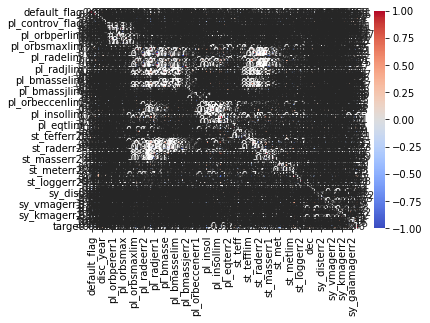

In [77]:
sns.heatmap(finaldf.corr(), annot=True, cmap='coolwarm')

In [78]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1637 entries, 0 to 1402
Data columns (total 93 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          1637 non-null   object 
 1   hostname         1637 non-null   object 
 2   default_flag     1637 non-null   int64  
 3   sy_snum          1637 non-null   int64  
 4   sy_pnum          1637 non-null   int64  
 5   discoverymethod  1637 non-null   object 
 6   disc_year        1637 non-null   int64  
 7   disc_facility    1637 non-null   object 
 8   soltype          1637 non-null   object 
 9   pl_controv_flag  1637 non-null   int64  
 10  pl_refname       1637 non-null   object 
 11  pl_orbper        1539 non-null   float64
 12  pl_orbpererr1    1476 non-null   float64
 13  pl_orbpererr2    1476 non-null   float64
 14  pl_orbperlim     1539 non-null   float64
 15  pl_orbsmax       979 non-null    float64
 16  pl_orbsmaxerr1   814 non-null    float64
 17  pl_orbsmaxerr2

In [79]:
CategoricalFeatures=[i for i in finaldf.columns if finaldf[i].dtypes=='O']
finaldf[CategoricalFeatures]

,pl_name,hostname,discoverymethod,disc_facility,soltype,pl_refname,pl_bmassprov,st_refname,st_spectype,st_metratio,sy_refname,rastr,decstr,rowupdate,pl_pubdate,releasedate
0,Teegarden's Star b,Teegarden's Star,Radial Velocity,Calar Alto Observatory,Published Confirmed,<a refstr=ZECHMEISTER_ET_AL__2019 href=https:/...,Msini,<a refstr=ZECHMEISTER_ET_AL__2019 href=https:/...,M7.0 V,[Fe/H],<a refstr=STASSUN_ET_AL__2019 href=https://ui....,02h53m04.59s,+16d51m53.65s,2019-06-24 00:00:00,2019-07,2019-06-27 00:00:00
1,TOI-700 d,TOI-700,Transit,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,<a refstr=GILBERT_ET_AL__2023 href=https://ui....,NaN,<a refstr=GILBERT_ET_AL__2023 href=https://ui....,M2.5 V,[Fe/H],<a refstr=STASSUN_ET_AL__2019 href=https://ui....,06h28m22.97s,-65d34m43.01s,2023-01-18 00:00:00,2023-01,2023-01-18 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,HATS-32 b,HATS-32,Transit,HATSouth,Published Confirmed,<a refstr=IVSHINA__AMP__WINN_2022 href=https:/...,NaN,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,23h04m18.02s,-21d16m19.26s,2022-10-18 00:00:00,2022-04,2022-10-18 00:00:00
1402,HATS-33 b,HATS-33,Transit,HATSouth,Published Confirmed,<a refstr=PATEL__AMP__ESPINOZA_2022 href=https...,NaN,<a refstr=DE_VAL_BORRO_ET_AL__2016 href=https:...,NaN,[Fe/H],<a refstr=STASSUN_ET_AL__2019 href=https://ui....,19h38m32.09s,-55d19m48.97s,2022-05-03 00:00:00,2022-05,2022-05-03 00:00:00


In [80]:
CategoricalFeatures

['pl_name',
 'hostname',
 'discoverymethod',
 'disc_facility',
 'soltype',
 'pl_refname',
 'pl_bmassprov',
 'st_refname',
 'st_spectype',
 'st_metratio',
 'sy_refname',
 'rastr',
 'decstr',
 'rowupdate',
 'pl_pubdate',
 'releasedate']

In [81]:
finaldf.st_metratio.isnull().sum()/len(finaldf)

0.4471594379963348

In [82]:
finaldf['PlanetNumber'] = finaldf['pl_name'].str.extract(r'([a-zA-Z])$', expand=False)

In [83]:
finaldf.sample(5)

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,pl_refname,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassprov,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,ttv_flag,st_refname,st_spectype,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_metratio,st_logg,st_loggerr1,st_loggerr2,st_logglim,sy_refname,rastr,ra,decstr,dec,sy_dist,sy_disterr1,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate,target,PlanetNumber
808,HAT-P-1 b,HAT-P-1,0,2,1,Transit,2006,HATNet,Published Confirmed,0,<a refstr=WAKEFORD_ET_AL__2013 href=https://ui...,4.465300,5.500000e-07,-5.500000e-07,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<a refstr=WAKEFORD_ET_AL__2013 href=https://ui...,NaN,6000.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,NaN,NaN,0.0,[Fe/H],4.50,NaN,NaN,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,22h57m46.89s,344.445363,+38d40m29.71s,38.674919,158.9790,0.9770,-0.9650,9.827,0.194,-0.194,8.858,0.018,-0.018,10.17860,0.000384,-0.000384,2015-08-26 00:00:00,2013-11,2015-08-27 00:00:00,0,b
1075,HAT-P-35 b,HAT-P-35,0,3,1,Transit,2011,HATNet,Published Confirmed,0,<a refstr=BAKOS_ET_AL__2012 href=https://ui.ad...,3.646706,2.100000e-05,-2.100000e-05,0.0,0.0498,0.0006,-0.0006,0.0,14.930,1.098,-1.098,0.0,1.332,0.098,-0.098,0.0,334.9790,10.48800,-10.48800,0.0,1.05400,0.03300,-0.0330,0.0,Mass,0.025,0.018,-0.018,0.0,NaN,NaN,NaN,NaN,1581.0,45.0,-45.0,0.0,0,<a refstr=BAKOS_ET_AL__2012 href=https://ui.ad...,NaN,6096.0,88.0,NaN,0.0,1.44,0.08,NaN,0.0,1.24,0.05,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,08h13m00.17s,123.250703,+04d47m13.30s,4.787029,506.9650,13.1930,-12.5510,12.389,0.092,-0.092,11.030,0.021,-0.021,12.28020,0.000334,-0.000334,2020-03-13 00:00:00,2012-07,2014-05-14 00:00:00,0,b
926,HAT-P-2 b,HAT-P-2,0,1,1,Transit,2007,HATNet,Published Confirmed,0,<a refstr=BAKOS_ET_AL__2007 href=https://ui.ad...,5.633410,1.300000e-04,-1.300000e-04,0.0,0.0677,0.0014,-0.0014,0.0,11.007,0.426,-1.177,0.0,0.982,0.038,-0.105,0.0,2873.1832,158.91500,-158.91500,0.0,9.04000,0.50000,-0.5000,0.0,Mass,0.520,0.010,-0.010,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<a refstr=BAKOS_ET_AL__2007 href=https://ui.ad...,F8,6290.0,110.0,-110.0,0.0,1.47,0.04,-0.17,0.0,1.30,0.06,-0.1,0.0,0.12,0.08,-0.08,0.0,NaN,4.21,0.09,-0.01,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,16h20m36.34s,245.151432,+41d02m52.66s,41.047960,127.7740,0.4250,-0.4230,8.720,0.030,-0.030,7.603,0.020,-0.020,8.59842,0.000250,-0.000250,2018-09-25 00:00:00,2007-11,2016-02-04 00:00:00,0,b
12,GJ 180 c,GJ 180,1,1,3,Radial Velocity,2014,Multiple Observatories,Published Confirmed,0,<a refstr=TUOMI_ET_AL__2014 href=https://ui.ad...,24.329000,5.200000e-02,-6.600000e-02,0.0,0.1290,0.0070,-0.0170,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.4000,3.70000,-4.10000,0.0,0.02014,0.01164,-0.0129,0.0,Msini,0.090,0.200,-0.090,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<a refstr=TUOMI_ET_AL__2014 href=https://ui.ad...,M2 V,3371.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.43,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,04h53m50.42s,73.460097,-17d46m34.30s,-17.776194,11.9407,0.0045,-0.0045,10.914,0.026,-0.026,6.598,0.021,-0.021,9.93395,0.000396,-0.000396,2019-10-04 00:00:00,2014-06,2019-10-10 00:00:00,1,c
1319,HATS-12 b,HATS-12,

In [97]:
finaldf.drop(CategoricalFeatures,inplace=True,axis=1)

In [98]:
finaldf.sample(5)

,default_flag,sy_snum,sy_pnum,disc_year,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,ttv_flag,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_logg,st_loggerr1,st_loggerr2,st_logglim,ra,dec,sy_dist,sy_disterr1,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,target,PlanetNumber
1139,0,1,1,2012,0,3.332683,4.600000e-06,-4.400000e-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5645.0,74.0,-74.0,0.0,1.10,0.04,-0.02,0.0,1.05,0.03,-0.04,0.0,0.23,0.08,-0.08,0.0,4.37,0.02,-0.02,0.0,128.925689,10.206587,528.82500,7.587000,-7.379000,13.279,0.057,-0.057,11.764,0.023,-0.023,13.21650,0.000296,-0.000296,0,b
241,0,1,1,2010,0,4.035190,3.000000e-05,-3.000000e-05,0.0,0.05107,0.0003,-0.00031,0.0,9.92,0.157,-0.157,0.0,0.885,0.014,-0.014,0.0,423.03173,23.20159,-23.20159,0.0,1.33100,0.07300,-0.07300,0.0,0.067,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5945.0,90.0,-90.0,0.0,1.01,0.03,-0.03,0.0,1.09,0.02,-0.02,0.0,0.01,0.07,-0.07,0.0,NaN,NaN,NaN,NaN,102.721143,-5.086456,1148.93000,62.120000,-56.150000,15.005,0.297,-0.297,13.376,0.039,-0.039,14.91470,0.000500,-0.000500,0,b
975,0,2,1,2010,0,3.355244,2.800000e-07,-2.800000e-07,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.825117,14.262606,415.34400,6.636000,-6.435000,11.762,0.022,-0.022,10.543,0.020,-0.020,11.63960,0.000476,-0.000476,0,b
434,0,1,2,2016,0,23.226000,3.022000e-03,-3.156000e-03,0.0,NaN,NaN,NaN,NaN,2.30,0.300,-0.200,0.0,0.210,0.030,-0.020,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0.95,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.444513,-10.862547,320.07000,6.392000,-6.152000,12.488,0.044,-0.044,10.857,0.021,-0.021,12.20380,0.000255,-0.000255,0,c
608,1,1,3,2023,0,34.369000,7.300000e-02,-7.300000e-02,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.03000,0.49000,-0.49000,0.0,0.01897,0.00154,-0.00154,0.0,0.140,0.09,-0.09,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3522.0,70.0,-70.0,0.0,0.46,0.01,-0.01,0.0,0.46,0.01,-0.01,0.0,-0.01,0.12,-0.12,0.0,4.78,0.03,-0.03,0.0,146.121464,-45.779016,9.41263,0.002835,-0.002835,10.153,0.044,-0.044,5.780,0.020,-0.020,9.15159,0.000650,-0.000650,0,d


In [99]:
finaldf.shape

(1637, 78)

In [102]:
finaldf['PlanetNumber'].unique()

array(['b', 'd', 'c', 'e', 'f', 'g', nan], dtype=object)

In [ ]:
finaldf['PlanetNumber'].isnul

In [ ]:
OE=OrdinalEncoder(categories=['b','c','d','e','f','g'])

In [100]:
[col for col in finaldf.columns if abs(finaldf['target'].corr(finaldf[col])) <= 0.1]

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [86]:
finaldf.drop(columns=[col for col in finaldf.columns if abs(finaldf['target'].corr(finaldf[col])) <= 0.1])

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
finaldf['target'].corr(finaldf['sy_pnum'])

0.3388170577936106